Read in needed libraries.

In [1]:
import csv
import os
import numpy
import pandas

%matplotlib notebook
import matplotlib.pyplot as plt

Read in data set.

In [2]:
#set working directory
os.chdir('/Users/brinberg/Desktop/ist-557-final/data')

In [3]:
#reading in data
train = pandas.read_csv('train_users_2.csv', encoding='utf-8')
train.head(n = 100)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
train.shape

(213451, 16)

<IPython.core.display.Javascript object>


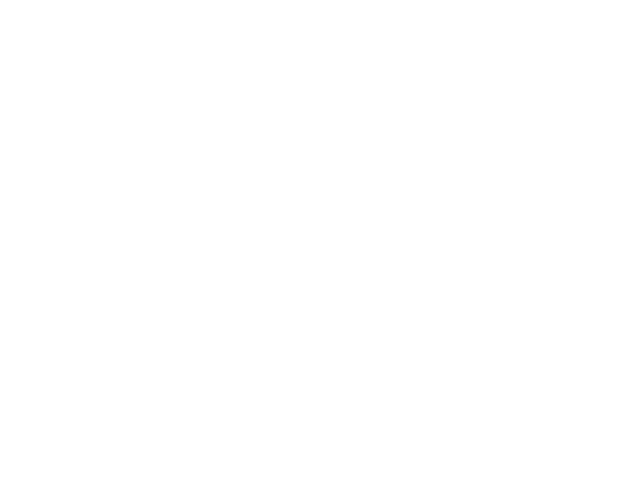

In [5]:
train.hist()
plt.show()

In [6]:
#the age variable looks a bit off (i.e., some people entered the year they were born instead of their age), 
#so I'm going to follow some pre-processing steps from 
#https://github.com/davidgasquez/kaggle-airbnb/blob/master/notebooks/Preprocessing.ipynb

user_with_year_age_mask = train['age'] > 1000
train.loc[user_with_year_age_mask, 'age'] = 2015 - train.loc[user_with_year_age_mask, 'age']

In [7]:
train.loc[(train['age'] > 100) | (train['age'] < 18), 'age'] = -1

In [8]:
#modifying date information
#again, using code from https://github.com/davidgasquez/kaggle-airbnb/blob/master/notebooks/Preprocessing.ipynb
train['date_account_created'] = pandas.to_datetime(train['date_account_created'], errors='ignore')
train['date_first_active'] = pandas.to_datetime(train['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [9]:
#Convert to DatetimeIndex:
date_account_created = pandas.DatetimeIndex(train['date_account_created'])
date_first_active = pandas.DatetimeIndex(train['date_first_active'])

In [10]:
#split dates into day, week, month, year:
train['day_account_created'] = date_account_created.day
train['weekday_account_created'] = date_account_created.weekday
train['week_account_created'] = date_account_created.week
train['month_account_created'] = date_account_created.month
train['year_account_created'] = date_account_created.year
train['day_first_active'] = date_first_active.day
train['weekday_first_active'] = date_first_active.weekday
train['week_first_active'] = date_first_active.week
train['month_first_active'] = date_first_active.month
train['year_first_active'] = date_first_active.year

In [11]:
#Get the difference(time lag) between the date in which the account was created and when it was first active:
train['time_lag'] = (date_account_created.values - date_first_active.values).astype(int)

In [12]:
#drop duplicated columns
drop_list = [
    'date_account_created',
    'date_first_active',
    'timestamp_first_active'
]

train.drop(drop_list, axis=1, inplace=True)

In [13]:
train.head(n = 10)

,id,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,weekday_account_created,week_account_created,month_account_created,year_account_created,day_first_active,weekday_first_active,week_first_active,month_first_active,year_first_active,time_lag
0,gxn3p5htnn,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,0,26,6,2010,19,3,12,3,2009,40246025000000000
1,820tgsjxq7,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,...,2,21,5,2011,23,5,21,5,2009,63180711000000000
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,1,39,9,2010,9,1,24,6,2009,41042833000000000
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,49,12,2011,31,5,44,10,2009,66074311000000000
4,87mebub9p4,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,1,37,9,2010,8,1,50,12,2009,24169735000000000
5,osr2jwljor,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,...,4,53,1,2010,1,4,53,1,2010,-78979000000000
6,lsw9q7uk0j,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,...,5,53,1,2010,2,5,53,1,2010,-5158000000000
7,0d01nltbrs,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,...,6,53,1,2010,3,6,53,1,2010,-69545000000000
8,a1vcnhxeij,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,...,0,1,1,2010,4,0,1,1,2010,-2531000000000
9,6uh8zyj2gn,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,...,0,1,1,2010,4,0,1,1,2010,-9478000000000


In [14]:
list(train)

['id',
 'date_first_booking',
 'gender',
 'age',
 'signup_method',
 'signup_flow',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser',
 'country_destination',
 'day_account_created',
 'weekday_account_created',
 'week_account_created',
 'month_account_created',
 'year_account_created',
 'day_first_active',
 'weekday_first_active',
 'week_first_active',
 'month_first_active',
 'year_first_active',
 'time_lag']

<IPython.core.display.Javascript object>


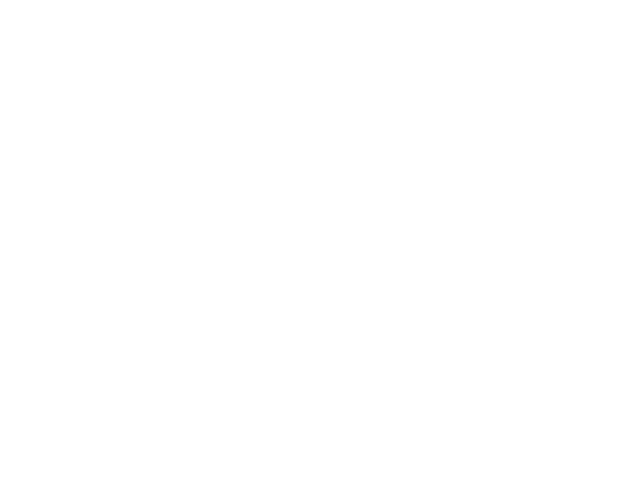

In [15]:
train.hist()
plt.show()

In [16]:
#making sure categorical variables are categorical
train["gender"] = train["gender"].astype('category')
train["signup_method"] = train["signup_method"].astype('category')
train["language"] = train["language"].astype('category')
train["affiliate_channel"] = train["affiliate_channel"].astype('category')
train["affiliate_provider"] = train["affiliate_provider"].astype('category')
train["first_affiliate_tracked"] = train["first_affiliate_tracked"].astype('category')
train["signup_app"] = train["signup_app"].astype('category')
train["first_device_type"] = train["first_device_type"].astype('category')
train["first_browser"] = train["first_browser"].astype('category')
train["country_destination"] = train["country_destination"].astype('category')

In [17]:
#count descriptives 
train.describe()

,age,signup_flow,day_account_created,weekday_account_created,week_account_created,month_account_created,year_account_created,day_first_active,weekday_first_active,week_first_active,month_first_active,year_first_active,time_lag
count,125461.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,2.134510e+05
mean,35.844095,3.267387,15.869230,2.764246,24.392245,6.022459,2013.023846,15.869071,2.764152,24.392053,6.022385,2013.023218,-2.584637e+13
std,12.707088,7.637707,8.740107,1.944807,14.019873,3.236690,0.938489,8.739582,1.944793,14.019086,3.236501,0.939039,1.032660e+15
min,-1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2010.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,-8.639900e+13
25%,28.000000,0.000000,8.000000,1.000000,13.000000,3.000000,2012.000000,8.000000,1.000000,13.000000,3.000000,2012.000000,-7.254100e+13
50%,33.000000,0.000000,16.000000,3.000000,23.000000,6.000000,2013.000000,16.000000,3.000000,23.000000,6.000000,2013.000000,-5.656000e+13
75%,42.000000,0.000000,23.000000,4.000000,36.000000,9.000000,2014.000000,23.000000,4.000000,36.000000,9.000000,2014.000000,-1.670400e+13
max,100.000000,25.000000,31.000000,6.000000,53.000000,12.000000,2014.000000,31.000000,6.000000,53.000000,12.000000,2014.000000,1.257476e+17


In [18]:
print(train["gender"].describe())
print(train["signup_method"].describe())
print(train["language"].describe())
print(train["affiliate_channel"].describe())
print(train["affiliate_provider"].describe())
print(train["first_affiliate_tracked"].describe())
print(train["signup_app"].describe())
print(train["first_device_type"].describe())
print(train["first_browser"].describe())
print(train["country_destination"].describe())

count        213451
unique            4
top       -unknown-
freq          95688
Name: gender, dtype: object
count     213451
unique         3
top        basic
freq      152897
Name: signup_method, dtype: object
count     213451
unique        25
top           en
freq      206314
Name: language, dtype: object
count     213451
unique         8
top       direct
freq      137727
Name: affiliate_channel, dtype: object
count     213451
unique        18
top       direct
freq      137426
Name: affiliate_provider, dtype: object
count        207386
unique            7
top       untracked
freq         109232
Name: first_affiliate_tracked, dtype: object
count     213451
unique         4
top          Web
freq      182717
Name: signup_app, dtype: object
count          213451
unique              9
top       Mac Desktop
freq            89600
Name: first_device_type, dtype: object
count     213451
unique        52
top       Chrome
freq       63845
Name: first_browser, dtype: object
count     213451
uniq

In [19]:
#summary statistics for users data by country destination
bycountry = train.groupby('country_destination')

In [20]:
#examining age differences by country destination
bycountry['age'].describe()

country_destination       
AU                   count      436.000000
                     mean        36.472477
                     std         11.952460
                     min         -1.000000
                     25%         29.000000
                     50%         34.000000
                     75%         43.000000
                     max         73.000000
CA                   count     1077.000000
                     mean        36.191272
                     std         12.274456
                     min         -1.000000
                     25%         29.000000
                     50%         34.000000
                     75%         42.000000
                     max         88.000000
DE                   count      851.000000
                     mean        35.843713
                     std         12.988964
                     min         -1.000000
                     25%         28.000000
                     50%         33.000000
                     75%   

In [21]:
#examining gender differences by country destination
train.groupby(['country_destination','gender']).size()
#more women going to Spain and France and NDF
#more men going other

country_destination  gender   
AU                   -unknown-      143
                     FEMALE         207
                     MALE           188
                     OTHER            1
CA                   -unknown-      491
                     FEMALE         455
                     MALE           477
                     OTHER            5
DE                   -unknown-      284
                     FEMALE         358
                     MALE           416
                     OTHER            3
ES                   -unknown-      715
                     FEMALE         853
                     MALE           677
                     OTHER            4
FR                   -unknown-     1713
                     FEMALE        1962
                     MALE          1335
                     OTHER           13
GB                   -unknown-      758
                     FEMALE         881
                     MALE           682
                     OTHER            3
IT       

In [22]:
#examining sign up method differences by country destination
train.groupby(['country_destination','signup_method']).size()

country_destination  signup_method
AU                   basic              393
                     facebook           146
CA                   basic             1105
                     facebook           322
                     google               1
DE                   basic              737
                     facebook           323
                     google               1
ES                   basic             1601
                     facebook           646
                     google               2
FR                   basic             3767
                     facebook          1253
                     google               3
GB                   basic             1727
                     facebook           597
IT                   basic             2147
                     facebook           686
                     google               2
NDF                  basic            87846
                     facebook         36252
                     google             4

In [23]:
#examining language differences by country destination
train.groupby(['country_destination','language']).size()
#more zh going to US

country_destination  language
AU                   de             3
                     en           531
                     fr             2
                     ko             1
                     zh             2
CA                   de             1
                     en          1412
                     fr             7
                     it             1
                     ja             2
                     ko             2
                     ru             1
                     zh             2
DE                   de            24
                     en          1016
                     es             6
                     fr             8
                     it             2
                     nl             2
                     ru             1
                     zh             2
ES                   cs             1
                     da             2
                     de             7
                     el             2
                    

In [24]:
#examining sign up method differences by country destination
train.groupby(['country_destination','affiliate_channel']).size()

country_destination  affiliate_channel
AU                   api                     17
                     content                  7
                     direct                 363
                     other                   10
                     remarketing              1
                     sem-brand               65
                     sem-non-brand           59
                     seo                     17
CA                   api                     30
                     content                 17
                     direct                 945
                     other                   70
                     remarketing              7
                     sem-brand              154
                     sem-non-brand          147
                     seo                     58
DE                   api                     22
                     content                  5
                     direct                 699
                     other                   35
 

In [25]:
#examining affiliate_provider differences by country destination
train.groupby(['country_destination','affiliate_provider']).size()

country_destination  affiliate_provider 
AU                   bing                       8
                     craigslist                 4
                     direct                   362
                     facebook                   2
                     facebook-open-graph        1
                     google                   135
                     gsp                        1
                     other                     23
                     vast                       3
CA                   bing                      14
                     craigslist                39
                     direct                   943
                     facebook                  13
                     facebook-open-graph        4
                     google                   344
                     other                     59
                     padmapper                  7
                     vast                       4
                     yahoo                      1
DE       

In [26]:
#examining signup_app differences by country destination
train.groupby(['country_destination','signup_app']).size()

country_destination  signup_app
AU                   Android            3
                     Moweb             14
                     Web              490
                     iOS               32
CA                   Android           15
                     Moweb             29
                     Web             1325
                     iOS               59
DE                   Android            9
                     Moweb             15
                     Web              996
                     iOS               41
ES                   Android           25
                     Moweb             34
                     Web             2085
                     iOS              105
FR                   Android           26
                     Moweb             56
                     Web             4719
                     iOS              222
GB                   Android           16
                     Moweb             33
                     Web             2159
  

In [27]:
#examining first_device_type differences by country destination
train.groupby(['country_destination','first_device_type']).size()

country_destination  first_device_type 
AU                   Android Phone             1
                     Android Tablet            2
                     Desktop (Other)           4
                     Mac Desktop             265
                     Other/Unknown            18
                     Windows Desktop         171
                     iPad                     42
                     iPhone                   36
CA                   Android Phone            13
                     Android Tablet           11
                     Desktop (Other)          18
                     Mac Desktop             679
                     Other/Unknown            49
                     Windows Desktop         520
                     iPad                     78
                     iPhone                   60
DE                   Android Phone             4
                     Android Tablet            5
                     Desktop (Other)          13
                     Mac Desk

In [28]:
#examining first_browser differences by country destination
train.groupby(['country_destination','first_browser']).size()

country_destination  first_browser       
AU                   -unknown-                 39
                     Android Browser            1
                     BlackBerry Browser         1
                     Chrome                   154
                     Chrome Mobile              2
                     Firefox                   94
                     IE                        54
                     Mobile Safari             56
                     Safari                   138
CA                   -unknown-                 98
                     AOL Explorer               1
                     Android Browser            3
                     Chrome                   486
                     Chrome Mobile              5
                     Chromium                   3
                     CoolNovo                   1
                     Firefox                  291
                     IE                       120
                     Mobile Safari             96
        

<IPython.core.display.Javascript object>


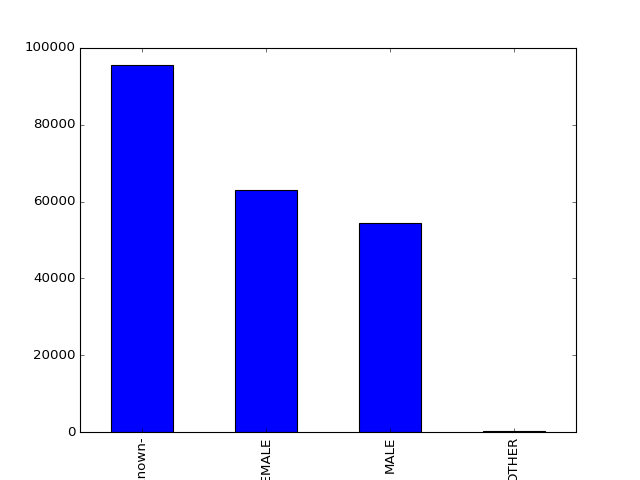

In [40]:
#plots for categorical variables
%matplotlib notebook
import matplotlib.pyplot as plt

train['gender'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


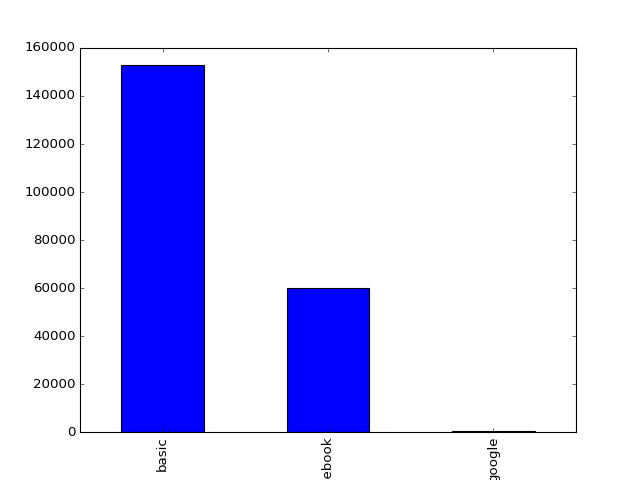

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['signup_method'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


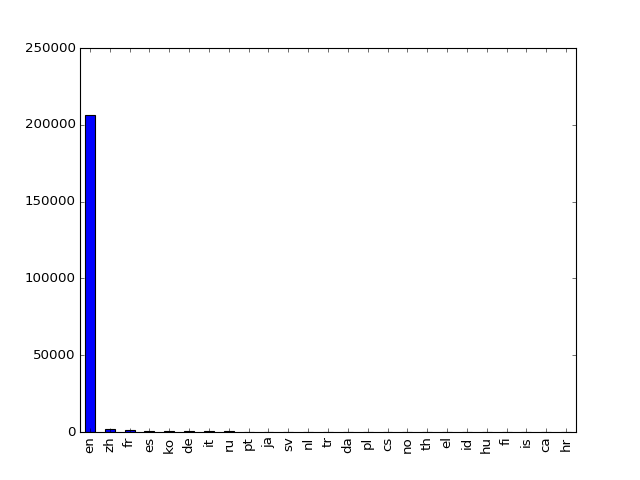

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['language'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


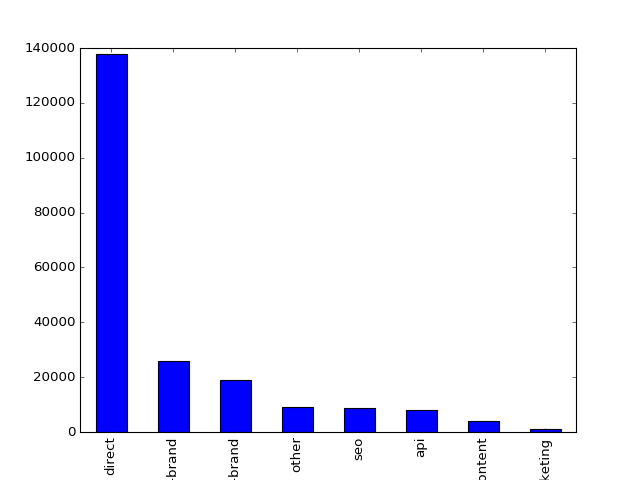

In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['affiliate_channel'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


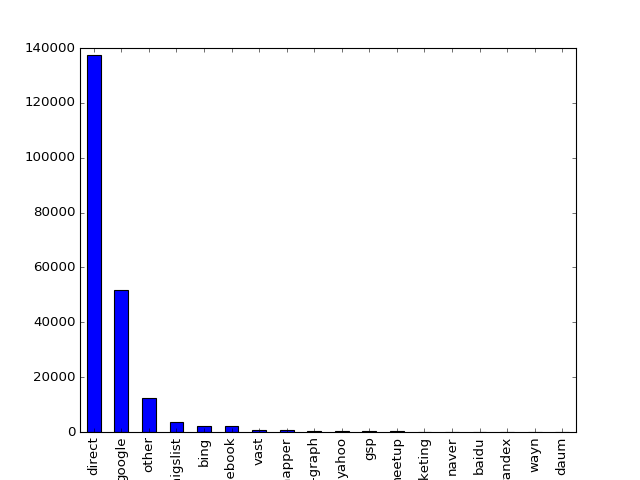

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['affiliate_provider'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


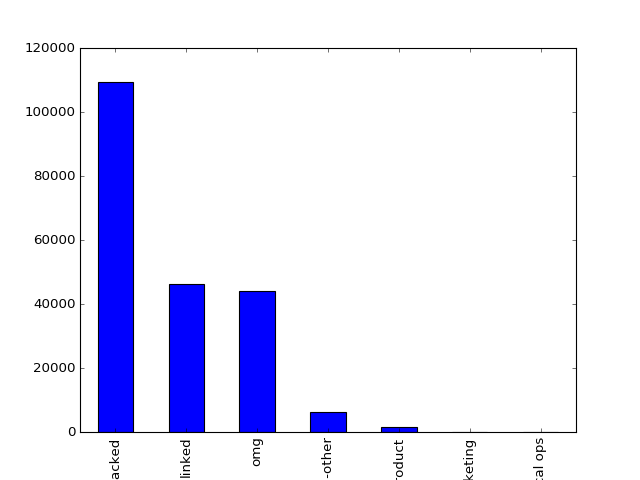

In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['first_affiliate_tracked'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


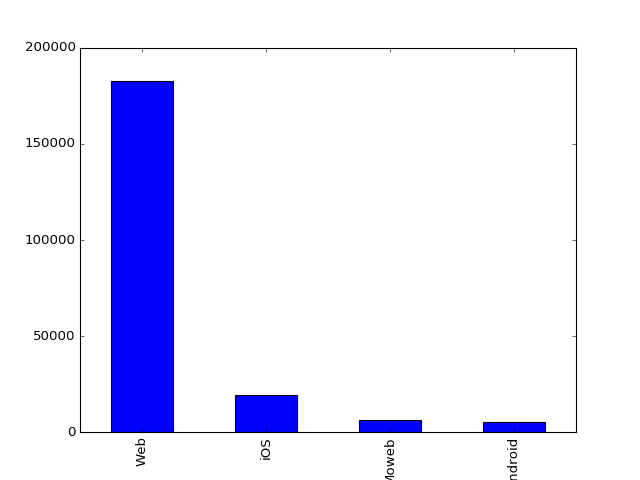

In [46]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['signup_app'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


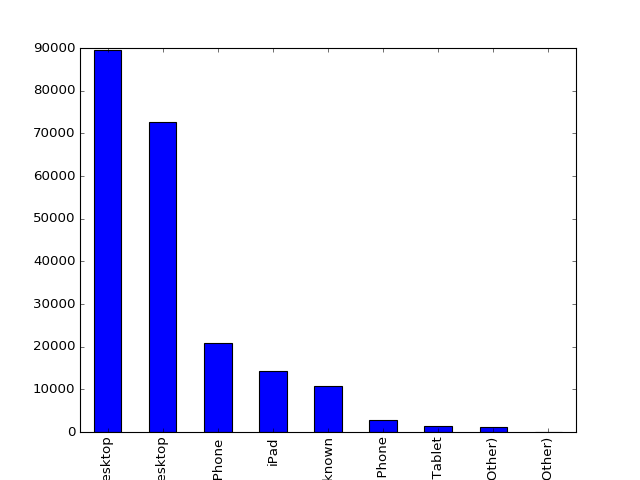

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['first_device_type'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


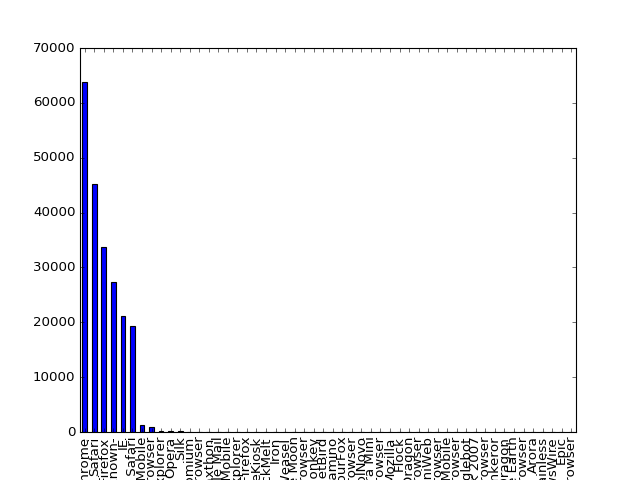

In [48]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['first_browser'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


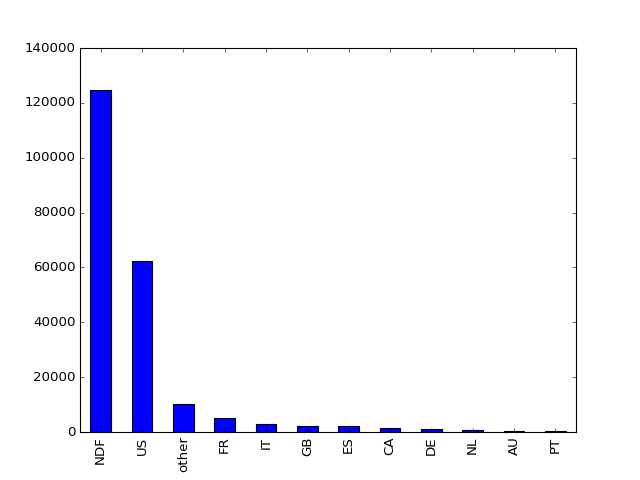

In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt

train['country_destination'].value_counts().plot(kind='bar')

In [39]:
#scatterplot matrix
#from pandas.tools.plotting import scatter_matrix

#my_scatter = scatter_matrix(train, alpha=0.2, figsize=(25, 25), diagonal='kde')

#plt.savefig(r"figure_1.png")